# COLLEGE PLACEMENT PREDICTION

**Importing libraries and Basic EDA**

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [34]:
df=pd.read_csv('college_placement_data.csv')
df                                       

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


## Basic Anaysis

In [123]:
df.head()                          

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1.0,3.0,1,8,1,1,1
1,21,0.0,1.0,0,7,1,1,1
2,22,0.0,4.0,1,6,0,0,1
3,21,1.0,4.0,0,8,0,1,1
4,22,1.0,5.0,0,8,1,0,1


In [36]:
df.tail()                              

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0
2965,23,Male,Civil,0,8,0,0,1


In [37]:
df.describe()                        #returns description of the data in the DataFrame

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [38]:
df.info()                          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


## Data Preprocessing

In [39]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
df["Gender"] = ord_enc.fit_transform(df[["Gender"]])
df[["Gender", "Gender"]].head(11)

,Gender,Gender
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,1.0,1.0
5,1.0,1.0
6,1.0,1.0
7,1.0,1.0
8,1.0,1.0
9,0.0,0.0


In [40]:
df["Stream"] = ord_enc.fit_transform(df[["Stream"]])
df[["Stream", "Stream"]].head(11)

,Stream,Stream
0,3.0,3.0
1,1.0,1.0
2,4.0,4.0
3,4.0,4.0
4,5.0,5.0
5,3.0,3.0
6,1.0,1.0
7,4.0,4.0
8,1.0,1.0
9,1.0,1.0


## Exploratory Data Analysis

In [41]:
df.shape

(2966, 8)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2966 non-null   int64  
 1   Gender             2966 non-null   float64
 2   Stream             2966 non-null   float64
 3   Internships        2966 non-null   int64  
 4   CGPA               2966 non-null   int64  
 5   Hostel             2966 non-null   int64  
 6   HistoryOfBacklogs  2966 non-null   int64  
 7   PlacedOrNot        2966 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 185.5 KB


In [43]:
# Is show the null values in data
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [44]:
# describe function gives statistical information about data
df.describe()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.834457,2.562374,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.371732,1.653853,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,1.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,3.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,4.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,1.000000,5.000000,3.000000,9.000000,1.000000,1.000000,1.000000


### Data Visualization

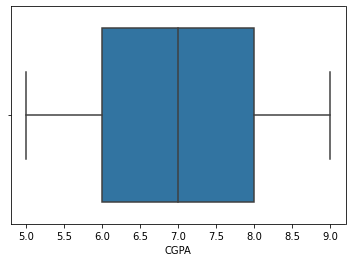

In [45]:
sns.boxplot(x=df['CGPA'])
plt.xlabel('CGPA')
plt.show()

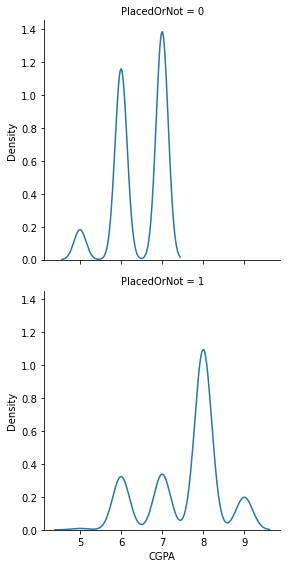

In [46]:
import seaborn as sns
sns.FacetGrid(df,row="PlacedOrNot",height=4).map(sns.kdeplot,"CGPA").add_legend()

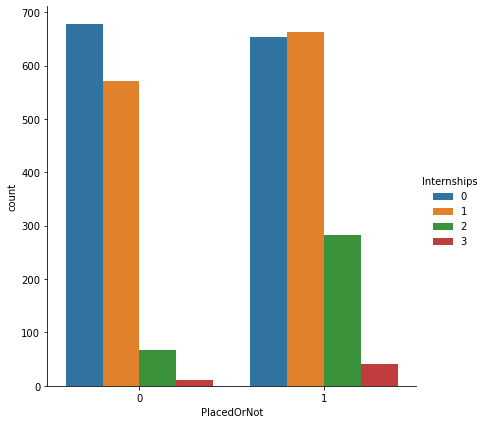

In [47]:
import seaborn as sns
sns.catplot(x="PlacedOrNot",hue="Internships" ,data=df,kind="count",height=6)

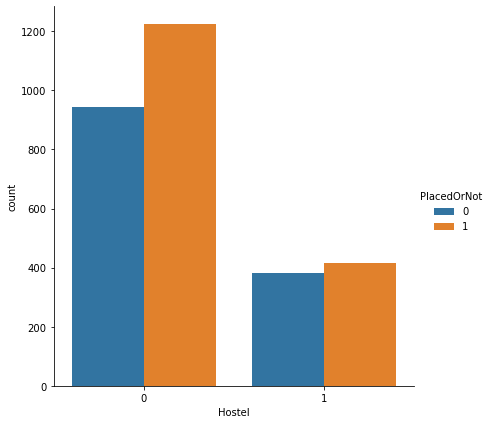

In [85]:
import seaborn as sns
sns.catplot(x="Hostel",hue="PlacedOrNot" ,data=df,kind="count",height=6)

In [87]:
df['Gender'].value_counts()

1.0    2475
0.0     491
Name: Gender, dtype: int64

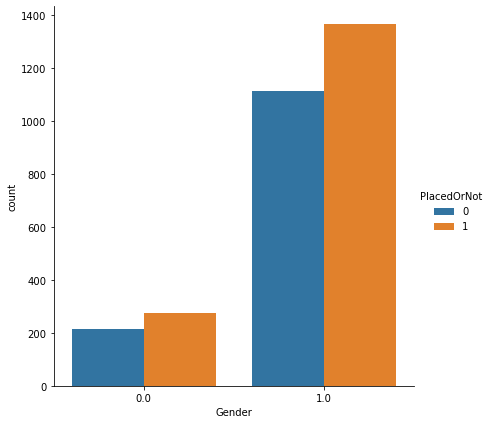

In [84]:
import seaborn as sns
sns.catplot(x="Gender",hue="PlacedOrNot" ,data=df,kind="count",height=6)

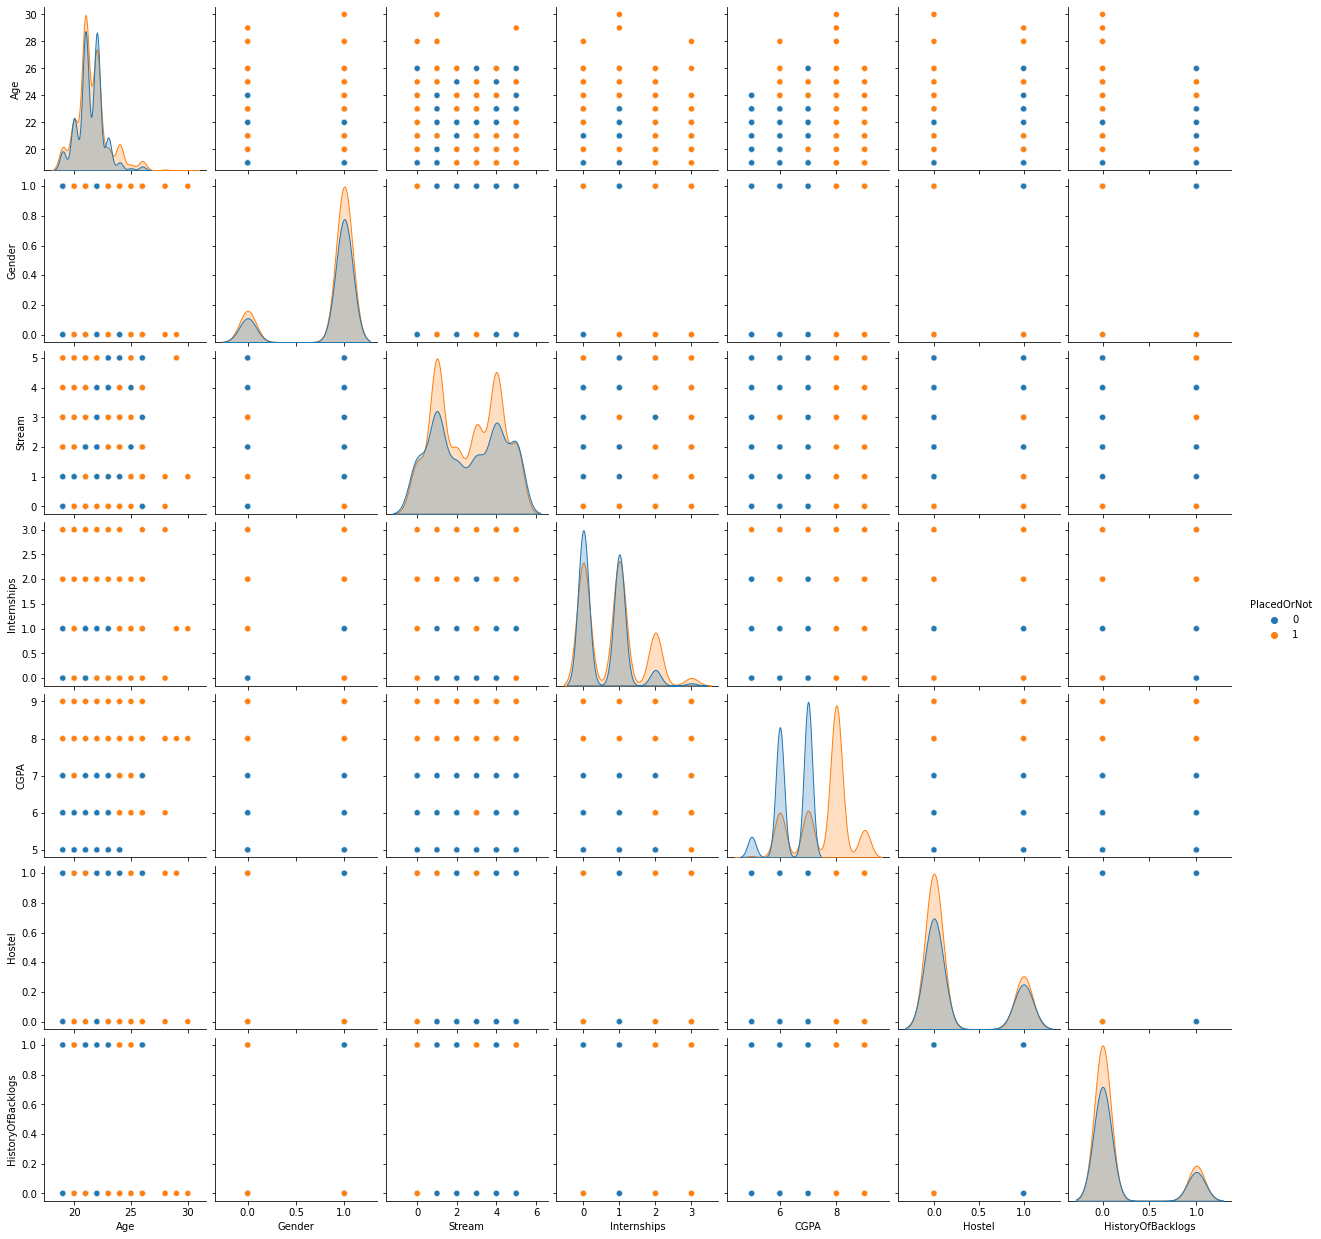

In [48]:
sns.pairplot(df,hue="PlacedOrNot")

In [49]:
# corr function shows the corelation between all columns
df.corr()      

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
Age,1.000000,-0.021538,0.008561,0.006552,-0.119787,0.003042,-0.042586,0.046943
Gender,-0.021538,1.000000,0.012138,-0.081526,-0.003512,-0.200254,0.026153,-0.006705
Stream,0.008561,0.012138,1.000000,-0.058317,0.004602,0.275049,0.010064,0.001341
Internships,0.006552,-0.081526,-0.058317,1.000000,0.023496,0.004617,-0.015118,0.179334
CGPA,-0.119787,-0.003512,0.004602,0.023496,1.000000,0.014991,0.002576,0.588648
Hostel,0.003042,-0.200254,0.275049,0.004617,0.014991,1.000000,0.103506,-0.038182
HistoryOfBacklogs,-0.042586,0.026153,0.010064,-0.015118,0.002576,0.103506,1.000000,-0.022337
PlacedOrNot,0.046943,-0.006705,0.001341,0.179334,0.588648,-0.038182,-0.022337,1.000000


***Heatmap***

In [50]:
# To find a correlation between feature and target..visualize heatmap using correlation matrix 

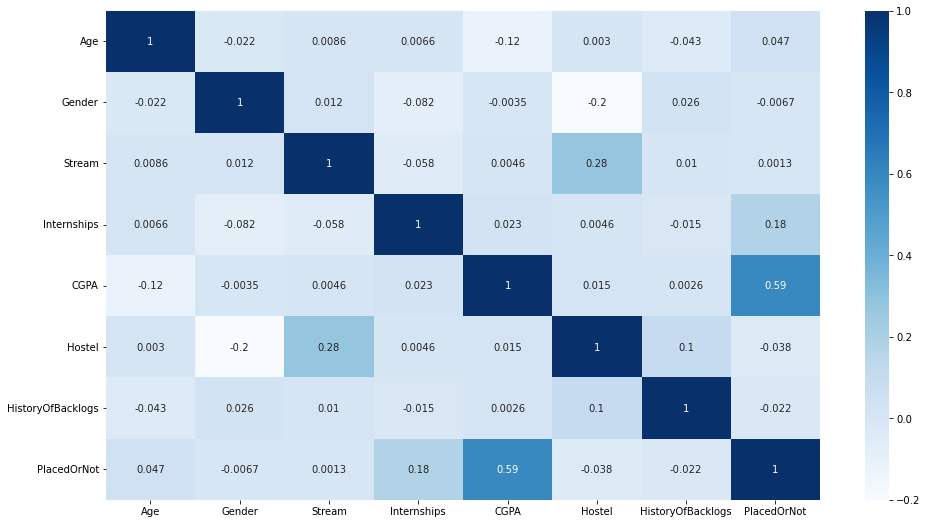

In [51]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()

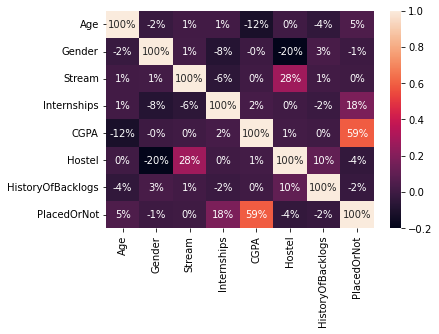

<Figure size 1152x648 with 0 Axes>

In [88]:
sns.heatmap(df.iloc[:,0:12].corr(),annot=True,fmt='.0%')
plt.figure(figsize=(16,9))
plt.show()

## Data Preparation

In [53]:
# Split the Data

In [54]:
# Input variable
x=df.iloc[:,:-1].values
x

array([[22.,  1.,  3., ...,  8.,  1.,  1.],
       [21.,  0.,  1., ...,  7.,  1.,  1.],
       [22.,  0.,  4., ...,  6.,  0.,  0.],
       ...,
       [22.,  1.,  4., ...,  7.,  0.,  0.],
       [22.,  1.,  1., ...,  7.,  0.,  0.],
       [23.,  1.,  0., ...,  8.,  0.,  0.]])

In [60]:
# Output variable
y=df.iloc[:,-1]
y

0       1
1       1
2       1
3       1
4       1
       ..
2961    0
2962    0
2963    0
2964    0
2965    1
Name: PlacedOrNot, Length: 2966, dtype: int64

In [61]:
# Split the data into train and test


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [63]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

## Model Training

In [65]:
# Logistic Regression

In [66]:
model=LogisticRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [67]:
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
print(f"Accuracy := {ac}")
print(f"confusion matrix :=\n {cm}")
print(f"classification report :=\n{cr}")

Accuracy := 0.7628032345013477
confusion matrix :=
 [[234  96]
 [ 80 332]]
classification report :=
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       330
           1       0.78      0.81      0.79       412

    accuracy                           0.76       742
   macro avg       0.76      0.76      0.76       742
weighted avg       0.76      0.76      0.76       742



### K-Nearest Neighbor Classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
print(f"Accuracy := {ac}")
print(f"confusion matrix :=\n {cm}")
print(f"classification report :=\n{cr}")

Accuracy := 0.877104377104377
confusion matrix :=
 [[240  23]
 [ 50 281]]
classification report :=
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       263
           1       0.92      0.85      0.89       331

    accuracy                           0.88       594
   macro avg       0.88      0.88      0.88       594
weighted avg       0.88      0.88      0.88       594



### SVM (Support Vector Machines)

In [41]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(xtrain, ytrain)
ypred = svm.predict(xtest)
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
print(f"Accuracy := {ac}")
print(f"confusion matrix :=\n {cm}")
print(f"classification report :=\n{cr}")

Accuracy := 0.7760942760942761
confusion matrix :=
 [[197  66]
 [ 67 264]]
classification report :=
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       263
           1       0.80      0.80      0.80       331

    accuracy                           0.78       594
   macro avg       0.77      0.77      0.77       594
weighted avg       0.78      0.78      0.78       594



### Naive Bayes

In [103]:
from sklearn.naive_bayes import GaussianNB
model_GB = GaussianNB()
model_GB.fit(xtrain, ytrain)
ypred = model_GB.predict(xtest)
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
print(f"Accuracy := {ac}")
print(f"confusion matrix :=\n {cm}")
print(f"classification report :=\n{cr}")

Accuracy := 0.8194070080862533
confusion matrix :=
 [[273  57]
 [ 77 335]]
classification report :=
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       330
           1       0.85      0.81      0.83       412

    accuracy                           0.82       742
   macro avg       0.82      0.82      0.82       742
weighted avg       0.82      0.82      0.82       742



### Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [124]:
dt=DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
ypred = dt.predict(xtest)
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
print(f"Accuracy := {ac}")
print(f"confusion matrix :=\n {cm}")
print(f"classification report :=\n{cr}")

rf=RandomForestClassifier()

Accuracy := 0.866576819407008
confusion matrix :=
 [[298  32]
 [ 67 345]]
classification report :=
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       330
           1       0.92      0.84      0.87       412

    accuracy                           0.87       742
   macro avg       0.87      0.87      0.87       742
weighted avg       0.87      0.87      0.87       742



### Random Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain, ytrain)
ypred = rf.predict(xtest)
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
print(f"Accuracy := {ac}")
print(f"confusion matrix :=\n {cm}")
print(f"classification report :=\n{cr}")

Accuracy := 0.8652291105121294
confusion matrix :=
 [[294  36]
 [ 64 348]]
classification report :=
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       330
           1       0.91      0.84      0.87       412

    accuracy                           0.87       742
   macro avg       0.86      0.87      0.86       742
weighted avg       0.87      0.87      0.87       742



In [121]:
# import matplotlib.pyplot as plt 
# from sklearn.tree import plot_tree
# plt.figure(figsize=(15,7.5))
# plot_tree(dt, 
#           filled=True, 
#           rounded=True, 
#           class_names=["yes", "no"], 
#           feature_names=df.columns) 

#### Decision Tree using GINI 

In [81]:
dt3=DecisionTreeClassifier(criterion="gini",min_samples_leaf=4)
mymodel(dt3)

              precision    recall  f1-score   support

           0       0.82      0.91      0.87       330
           1       0.92      0.84      0.88       412

    accuracy                           0.87       742
   macro avg       0.87      0.88      0.87       742
weighted avg       0.88      0.87      0.88       742

Accuracy: 0.8746630727762803


DecisionTreeClassifier(min_samples_leaf=4)

#### Decision Tree using Entropy

In [82]:
dt4=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=4)
mymodel(dt4)

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       330
           1       0.93      0.84      0.88       412

    accuracy                           0.88       742
   macro avg       0.88      0.88      0.88       742
weighted avg       0.88      0.88      0.88       742

Accuracy: 0.8773584905660378


DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4)

### Perceptron

In [90]:
from sklearn.linear_model import Perceptron

In [91]:
perc=Perceptron()

In [92]:
perc.fit(xtrain,ytrain)

Perceptron()

In [97]:
ypred = perc.predict(xtest)
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
print(f"Accuracy := {ac}")
print(f"confusion matrix :=\n {cm}")
print(f"classification report :=\n{cr}")

Accuracy := 0.555256064690027
confusion matrix :=
 [[  0 330]
 [  0 412]]
classification report :=
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       330
           1       0.56      1.00      0.71       412

    accuracy                           0.56       742
   macro avg       0.28      0.50      0.36       742
weighted avg       0.31      0.56      0.40       742



### Backpropagation

In [98]:
from sklearn.neural_network import MLPClassifier

In [100]:
nn=MLPClassifier()

In [101]:
nn.fit(xtrain,ytrain)

MLPClassifier()

In [102]:
ypred = nn.predict(xtest)
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
print(f"Accuracy := {ac}")
print(f"confusion matrix :=\n {cm}")
print(f"classification report :=\n{cr}")

Accuracy := 0.8288409703504043
confusion matrix :=
 [[300  30]
 [ 97 315]]
classification report :=
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       330
           1       0.91      0.76      0.83       412

    accuracy                           0.83       742
   macro avg       0.83      0.84      0.83       742
weighted avg       0.84      0.83      0.83       742



### K-Fold Cross Validation on Decision Trees,Random Forests and Support Vector Machine

Decision Tree : 0.873654 (0.021684)
Support Vector Machines: 0.766206 (0.024378)
Random Forest : 0.873203 (0.026209)


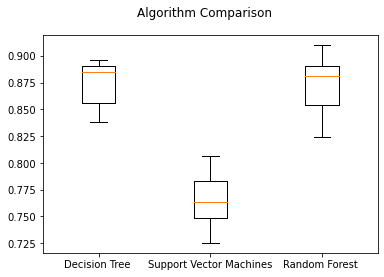

In [126]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# X = train_data_new[features]
# Y = train_data_new[target].values.ravel()
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('Decision Tree ', DecisionTreeClassifier()))
models.append(('Support Vector Machines', SVC()))
models.append(('Random Forest ', RandomForestClassifier(n_estimators = 100,criterion='entropy',random_state=0)))
# models.append(('LR',LogisticRegression()))
# evaluate each model in turn
results = []
names = []

scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=7,shuffle=True)
	cv_results = model_selection.cross_val_score(model, xtrain,ytrain, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
#plt.bar(results,height=100)
plt.subplot()
ax.set_xticklabels(names)
plt.show()

In [ ]:
from joblib import dump

model_rf=dump(rf,'Forest_model.pkl')
model_logr=dump(model,'Logr_model.pkl')
model_knn=dump(knn,'knn_model.pkl')
model_dt=dump(dt,'dt_model.pkl')
model_svm=dump(svm,'svm_model.pkl')
model_mlp=dump(nn,'backprop_model.pkl')
model_nb=dump(model_GB,'gnb_model.pkl')
model_perc=dump(perc,'perc_model.pkl')